<a href="https://colab.research.google.com/github/nevilshah444/FastAI/blob/main/FastAI_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#FastAI

FastAI is a library which consists of a single interface for majority of Deep Learning applications from time - series to tabular data and from computer vision to collaborative filtering.

FastAi provides high-level features and components in deep-learning for students to perform their various tasks quickly and easily

In [ ]:
# First step is to install fastbookin this colab
!pip install -Uqq fastbook


In [ ]:
# we will import FastAI library , which will need access to google drive.
import fastbook
fastbook.setup_book()

Mounted at /content/gdrive


In [ ]:
from fastbook import *

#1) cnn_learner

Dataset link: https://www.robots.ox.ac.uk/~vgg/data/pets/

This dataset contains about 7400 images consisting of cats and dogs and we will tune the pre-trained CNN model(convolution neural networks) and finetune to latest updates, which is designed for recognizing cats and dogs.

In [ ]:
#For downloading the model , it took about 4-5 minutes.

# For finetuning the model, it took about 2 minutes.
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)
# Finetune happened twice in this case 

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.166491,0.015540,0.005413,01:42


epoch,train_loss,valid_loss,error_rate,time
0,0.047309,0.012341,0.003383,02:20


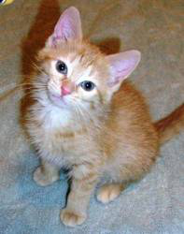

In [ ]:
img = PILImage.create(image_cat())
img.to_thumb(208)
img.to_thumb(234)

In [ ]:
# we will give a separate image to check , if the model is correctly predicting a cat orn not]
uploader = SimpleNamespace(data = ['/content/gdrive/MyDrive/255_Dataset/abcd.png'])

In [ ]:
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.") # Thisimage is a cat and the probability is showing one
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True.
Probability it's a cat: 1.000000


#2) Unet-learner(for segmentation)

Reference paper link: http://www0.cs.ucl.ac.uk/staff/G.Brostow/papers/Brostow_2009-PRL.pdf

Segementation is a process which can capture and identify every single pixel in an image. This prebuilt model is defined with the usecase to identify the pixels in an  image.

In [ ]:
path = untar_data(URLs.CAMVID_TINY) # camvid dataset
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)
#unet_learner model called here
learn = unet_learner(dls, resnet34)
# this model is finetuned at this step with its new updates at 12 epochs
learn.fine_tune(12)
#The train_loss and the validation loss are reduced to  0.76 and 0.6 respectively

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


epoch,train_loss,valid_loss,time
0,2.704526,5.324638,00:04


epoch,train_loss,valid_loss,time
0,2.339842,1.834528,00:04
1,1.895166,1.157824,00:04
2,1.620216,1.166766,00:04
3,1.522359,0.978428,00:04
4,1.395371,0.915614,00:04
5,1.265109,0.722722,00:04
6,1.144406,0.696250,00:04
7,1.038227,0.626213,00:04
8,0.946019,0.607467,00:04
9,0.869759,0.605964,00:04


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


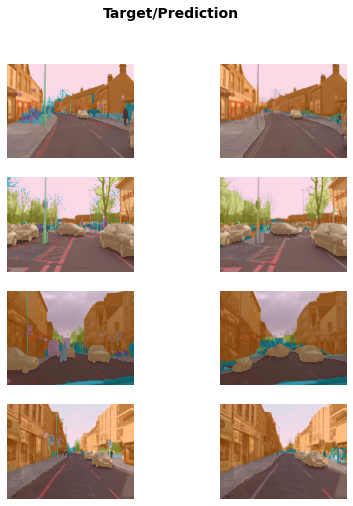

In [ ]:
# After running this code, this 4  images will show how a pixel would be identified
learn.show_results(max_n=4, figsize=(7,8))

#3)Text_classifier_learner (for sentiment analysis)

Reference Link: https://ai.stanford.edu/~ang/papers/acl11-WordVectorsSentimentAnalysis.pdf

In sentiment analysis, we will use IMDB review dataset, where this model is trained to sentiment the review of a movie.

In [ ]:
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test', bs=32)
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
# this model is downloaded and finetuned at 4 epochs .
learn.fine_tune(4, 1e-2)
# this model took a lot of time to finetune itself
# The training loss and value loss after 4 epochs.

epoch,train_loss,valid_loss,accuracy,time
0,0.469096,0.403301,0.821520,12:29


epoch,train_loss,valid_loss,accuracy,time
0,0.300069,0.231708,0.908520,22:34
1,0.252996,0.215149,0.914560,22:36
2,0.211482,0.182122,0.929120,22:35
3,0.132164,0.184956,0.930360,22:34


In [ ]:
# let us sentiment the following statement and see what is the output.
learn.predict("I really liked that movie!")

('pos', TensorText(1), TensorText([0.0030, 0.9970]))

4)Tabular learner (for tabular data)

reference paper: http://robotics.stanford.edu/~ronnyk/nbtree.pdf

we will use adults.csv dataset, which is a tabular dataset and contains information regarding various detail of an adult like age, marital status etc.



In [ ]:
from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy)

In [ ]:
# here, we will not finetune the model as this model is not prebuilt , instead we will use fit_one_cycle at 10 epochs
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,time
0,0.359902,0.350741,0.836149,00:06
1,0.366028,0.358218,0.834152,00:06
2,0.355143,0.352716,0.837531,00:06
3,0.360129,0.352800,0.835381,00:06
4,0.349834,0.350251,0.834152,00:06
5,0.342162,0.348515,0.835688,00:06
6,0.342358,0.346516,0.836763,00:06
7,0.342501,0.348614,0.836916,00:09
8,0.346788,0.346621,0.838298,00:07
9,0.339007,0.346305,0.839681,00:06


5) Collab_learner(for numeric data)

Movie_lens(dataset):https://dl.acm.org/doi/10.1145/2827872

We will use this model as a recommender system, which will predict the rating for a movie between 0.5 to 5.0.

In [ ]:
from fastai.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5,5.5))

# here, we will not finetune the model as this model is not prebuilt , instead we will use fit_one_cycle at 4 epochs

learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,time
0,1.549472,1.532109,00:02
1,1.407005,1.294586,00:02
2,1.168698,1.086434,00:00
3,1.053610,1.055458,00:00


In [ ]:
# let us see the results generated by the model.
learn.show_results()

,userId,movieId,rating,rating_pred
0,15.0,6.0,4.0,3.516296
1,59.0,52.0,4.0,3.478119
2,94.0,88.0,4.0,3.449142
3,88.0,92.0,3.5,3.404755
4,20.0,76.0,1.5,3.359094
5,34.0,14.0,5.0,3.402076
6,96.0,24.0,2.0,3.121867
7,98.0,4.0,4.5,3.328090
8,95.0,69.0,4.0,3.441913
